<a href="https://colab.research.google.com/github/falakchhaya/COVID19_India/blob/master/StatesDaily_Conf_Deceas_Recov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Let's use the api to get the data
#first let's import stuff

import numpy as np
import pandas as pd
import requests
import json
from pandas import json_normalize
import matplotlib.pyplot as plt


### Following are to deal with plot issues with dark background.
#!pip install --upgrade numpy pandas matplotlib seaborn jupyterlab
from matplotlib import style
style.use('ggplot') #or plt.style.use('ggplot')



In [0]:
states_confirmed = pd.read_csv('http://api.covid19india.org/states_daily_csv/confirmed.csv')
states_deceased = pd.read_csv('https://api.covid19india.org/states_daily_csv/deceased.csv')
states_recovered = pd.read_csv('https://api.covid19india.org/states_daily_csv/recovered.csv')

In [25]:
states_confirmed.info()
states_deceased.info()
states_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         40 non-null     object 
 1   TT           40 non-null     int64  
 2   AN           40 non-null     int64  
 3   AP           40 non-null     int64  
 4   AR           40 non-null     int64  
 5   AS           40 non-null     int64  
 6   BR           40 non-null     int64  
 7   CH           40 non-null     int64  
 8   CT           40 non-null     int64  
 9   DD           40 non-null     int64  
 10  DL           40 non-null     int64  
 11  DN           40 non-null     int64  
 12  GA           40 non-null     int64  
 13  GJ           40 non-null     int64  
 14  HP           40 non-null     int64  
 15  HR           40 non-null     int64  
 16  JH           40 non-null     int64  
 17  JK           40 non-null     int64  
 18  KA           40 non-null     int64  
 19  KL        

In [26]:
# Couple of issues
# (1) name of the last column is confusing, better to rename it (in the other two data frames as well.)
# (2) convert a couple of float columns to to int, may be after fixing nan values. Also fix the datatype of date column.
### Update, I didn't observe all null values in the last column. Renaming it is a futile exercise, now I know.
### So this cell is essentially pointless :P


states_confirmed = states_confirmed.rename(columns={'Unnamed: 39' :'Unnamed'})
states_deceased = states_deceased.rename(columns={'Unnamed: 39' :'Unnamed'})
states_recovered = states_recovered.rename(columns={'Unnamed: 39' :'Unnamed'})

#states_confirmed[['MP','Unnamed']] = states_confirmed[['MP','Unnamed']].astype('int64')
# Just realised that in all three data frames the last column is completely null. That can be dropped.

states_confirmed = states_confirmed.drop(columns=['Unnamed'])
states_deceased = states_deceased.drop(columns=['Unnamed'])
states_recovered = states_recovered.drop(columns=['Unnamed'])


print("confirmed") ; print(states_confirmed.columns)
print("deceased") ; print(states_deceased.columns)
print("recovered") ; print(states_recovered.columns)





confirmed
Index(['date', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD', 'DL',
       'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH',
       'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN',
       'TR', 'UP', 'UT', 'WB'],
      dtype='object')
deceased
Index(['date', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD', 'DL',
       'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH',
       'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN',
       'TR', 'UP', 'UT', 'WB'],
      dtype='object')
recovered
Index(['date', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD', 'DL',
       'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH',
       'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN',
       'TR', 'UP', 'UT', 'WB'],
      dtype='object')


In [27]:

#from the .info() we saw that apart from 'MP' in states_confirmed, there are no null values.
states_confirmed = states_confirmed.fillna(value=0)
states_confirmed.columns


# example # nested_full.city = nested_full.city.astype('category')
states_confirmed.MP = states_confirmed.MP.astype('int64')
states_confirmed.MP

0       0
1       0
2       0
3       0
4       0
5       0
6       4
7       0
8       2
9       0
10      1
11      8
12      5
13      9
14     10
15      0
16      8
17     19
18     32
19      9
20     47
21     25
22     14
23     63
24     34
25     51
26     70
27     40
28     78
29     33
30     52
31    127
32    197
33    226
34    146
35     92
36      5
37     78
38     67
39      0
Name: MP, dtype: int64

In [0]:
# Joining confirmed table with deceased

states_all = states_confirmed.join(states_deceased,how='left',rsuffix='death')

In [29]:
#states_all.shape #sanity check to see if the join has been alright
states_all
#print(states_all.shape); print(states_recovered.shape); print(states_confirmed.shape)

,date,TT,AN,AP,AR,AS,BR,CH,CT,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB,datedeath,TTdeath,ANdeath,APdeath,ARdeath,ASdeath,BRdeath,CHdeath,CTdeath,DDdeath,DLdeath,DNdeath,GAdeath,GJdeath,HPdeath,HRdeath,JHdeath,JKdeath,KAdeath,KLdeath,LAdeath,LDdeath,MHdeath,MLdeath,MNdeath,MPdeath,MZdeath,NLdeath,ORdeath,PBdeath,PYdeath,RJdeath,SKdeath,TGdeath,TNdeath,TRdeath,UPdeath,UTdeath,WBdeath
0,14-Mar-20,81,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,12,0,0,14-Mar-20,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15-Mar-20,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16-Mar-20,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,16-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17-Mar-20,11,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1,17-Mar-20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18-Mar-20,37,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,2,1,0,18-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19-Mar-20,27,0,2,0,0,0,1,1,0,4,0,0,2,0,1,0,0,1,1,0,0,4,0,0,0,0,0,0,0,0,2,0,3,1,0,3,1,0,19-Mar-20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,20-Mar-20,58,0,0,0,0,0,4,0,0,6,0,0,5,2,2,0,0,0,12,2,0,4,0,0,4,0,0,0,1,0,8,0,3,0,0,4,0,1,20-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21-Mar-20,78,0,2,0,0,0,0,0,0,7,0,0,7,0,2,0,0,5,12,3,0,12,0,0,0,0,0,0,10,0,7,0,2,3,0,4,0,2,21-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,22-Mar-20,67,0,1,0,0,2,1,0,0,0,0,0,4,0,0,0,0,6,15,0,0,10,0,0,2,0,0,0,8,0,4,0,6,3,0,2,0,3,22-Mar-20,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,23-Mar-20,102,0,1,0,0,1,1,0,0,3,0,0,12,1,7,0,0,7,28,0,0,23,0,0,0,0,0,0,2,0,4,0,6,3,0,2,1,0,23-Mar-20,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#Recovered wala table is joined here with confirmed and deaths wala tables.
#states_all = states_all.join(states_recovered,how='left', rsuffix='recov', on=['dateconfirm','date'])
states_all = states_all.merge(states_recovered,how='inner',left_on='date',right_on='date',suffixes=('','recov'))

In [31]:
states_all 

,date,TT,AN,AP,AR,AS,BR,CH,CT,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB,datedeath,...,UTdeath,WBdeath,TTrecov,ANrecov,APrecov,ARrecov,ASrecov,BRrecov,CHrecov,CTrecov,DDrecov,DLrecov,DNrecov,GArecov,GJrecov,HPrecov,HRrecov,JHrecov,JKrecov,KArecov,KLrecov,LArecov,LDrecov,MHrecov,MLrecov,MNrecov,MPrecov,MZrecov,NLrecov,ORrecov,PBrecov,PYrecov,RJrecov,SKrecov,TGrecov,TNrecov,TRrecov,UPrecov,UTrecov,WBrecov
0,14-Mar-20,81,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,12,0,0,14-Mar-20,...,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0
1,15-Mar-20,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,15-Mar-20,...,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0
2,16-Mar-20,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,16-Mar-20,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,17-Mar-20,11,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1,17-Mar-20,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18-Mar-20,37,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,2,1,0,18-Mar-20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19-Mar-20,27,0,2,0,0,0,1,1,0,4,0,0,2,0,1,0,0,1,1,0,0,4,0,0,0,0,0,0,0,0,2,0,3,1,0,3,1,0,19-Mar-20,...,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
6,20-Mar-20,58,0,0,0,0,0,4,0,0,6,0,0,5,2,2,0,0,0,12,2,0,4,0,0,4,0,0,0,1,0,8,0,3,0,0,4,0,1,20-Mar-20,...,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21-Mar-20,78,0,2,0,0,0,0,0,0,7,0,0,7,0,2,0,0,5,12,3,0,12,0,0,0,0,0,0,10,0,7,0,2,3,0,4,0,2,21-Mar-20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,22-Mar-20,67,0,1,0,0,2,1,0,0,0,0,0,4,0,0,0,0,6,15,0,0,10,0,0,2,0,0,0,8,0,4,0,6,3,0,2,0,3,22-Mar-20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,23-Mar-20,102,0,1,0,0,1,1,0,0,3,0,0,12,1,7,0,0,7,28,0,0,23,0,0,0,0,0,0,2,0,4,0,6,3,0,2,1,0,23-Mar-20,...,0,1,12,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
states_all = states_all.drop(columns=['datedeath'])

In [0]:
######## Important point
# Three of the dfs couldn't be joined if I changed the name of the 'time' column with suffixes during first join. Have to check for a workaround.

In [34]:
# pd.set_option('max_rows', 99999)
# pd.set_option('max_colwidth', 400)
# pd.describe_option('max_colwidth')

states_all.columns  #FPC prob  it doesn't give all column named


#The results show that it works fine. let's do it for other columns as well


Index(['date', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD',
       ...
       'PBrecov', 'PYrecov', 'RJrecov', 'SKrecov', 'TGrecov', 'TNrecov',
       'TRrecov', 'UPrecov', 'UTrecov', 'WBrecov'],
      dtype='object', length=115)

In [35]:
states_all.date = pd.to_datetime(states_all.date)
states_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Columns: 115 entries, date to WBrecov
dtypes: datetime64[ns](1), int64(114)
memory usage: 36.2 KB


In [0]:
states_confirmed.date = pd.to_datetime(states_confirmed.date)
states_deceased.date = pd.to_datetime(states_deceased.date)
states_recovered.date = pd.to_datetime(states_recovered.date)

In [37]:
(states_all.describe()).round(1)

,TT,AN,AP,AR,AS,BR,CH,CT,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB,TTdeath,ANdeath,...,UTdeath,WBdeath,TTrecov,ANrecov,APrecov,ARrecov,ASrecov,BRrecov,CHrecov,CTrecov,DDrecov,DLrecov,DNrecov,GArecov,GJrecov,HPrecov,HRrecov,JHrecov,JKrecov,KArecov,KLrecov,LArecov,LDrecov,MHrecov,MLrecov,MNrecov,MPrecov,MZrecov,NLrecov,ORrecov,PBrecov,PYrecov,RJrecov,SKrecov,TGrecov,TNrecov,TRrecov,UPrecov,UTrecov,WBrecov
count,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
mean,500.1,0.4,18.9,0.0,0.9,3.2,0.7,0.9,0.0,53.9,0.0,0.2,54.4,1.0,6.4,1.2,9.5,10.4,10.6,0.4,0.0,130.4,0.3,0.0,38.8,0.0,0.0,2.0,6.3,0.2,41.5,0.0,23.2,39.9,0.0,33.4,1.2,9.8,16.1,0.0,...,0.0,0.4,99.4,0.3,2.4,0.0,0.5,1.0,0.4,0.6,0.0,15.3,0.0,0.2,3.5,0.4,3.6,0.1,2.0,3.2,7.7,0.4,0.0,18.0,0.0,0.0,3.7,0.0,0.0,0.7,1.2,0.1,6.8,0.0,4.8,15.9,0.0,4.0,0.4,1.8
std,472.1,1.0,21.1,0.2,2.6,4.7,1.2,1.9,0.0,71.8,0.0,0.6,87.5,2.0,8.1,2.2,8.7,9.1,9.1,1.4,0.0,155.0,1.0,0.2,54.3,0.2,0.0,4.2,6.7,0.5,44.1,0.0,22.5,38.3,0.2,39.7,1.7,12.8,15.9,0.0,...,0.0,0.8,152.9,1.6,6.0,0.2,1.2,2.5,0.9,1.4,0.0,42.0,0.0,0.7,5.4,1.2,7.2,0.6,4.0,4.6,9.1,1.2,0.0,34.1,0.0,0.2,9.5,0.0,0.0,2.0,2.5,0.5,15.0,0.0,13.5,35.6,0.2,6.7,1.2,2.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,75.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,1.0,0.0,1.8,5.0,3.8,0.0,0.0,13.5,0.0,0.0,0.8,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.8,3.0,0.0,3.8,0.0,0.0,1.8,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,454.0,0.0,13.0,0.0,0.0,1.5,0.0,0.0,0.0,24.0,0.0,0.0,9.5,0.0,2.5,0.0,7.5,8.5,8.5,0.0,0.0,73.0,0.0,0.0,12.0,0.0,0.0,0.0,4.5,0.0,23.5,0.0,15.5,34.5,0.0,17.5,0.0,3.0,13.0,0.0,...,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
75%,858.2,0.2,34.2,0.0,0.2,4.0,1.0,1.0,0.0,75.8,0.0,0.0,76.5,1.0,8.2,1.0,14.0,14.2,14.2,0.0,0.0,212.8,0.0,0.0,54.8,0.0,0.0,1.0,10.0,0.0,80.8,0.0,43.0,74.2,0.0,46.8,2.0,16.5,27.0,0.0,...,0.0,0.0,121.5,0.0,1.2,0.0,0.0,0.0,0.0,0.2,0.0,3.2,0.0,0.0,5.5,0.0,4.5,0.0,1.2,5.0,13.0,0.0,0.0,18.5,0.0,0.0,4.0,0.0,0.0,0.0,1.2,0.0,5.0,0.0,1.5,6.5,0.0,4.5,0.0,3.0
max,1580.0,5.0,75.0,1.0,15.0,19.0,5.0,8.0,0.0,356.0,0.0,3.0,367.0,9.0,33.0,9.0,33.0,44.0,39.0,8.0,0.0,552.0,6.0,1.0,226.0,1.0,0.0,18.0,24.0,2.0,139.0,0.0,75.0,110.0,1.0,153.0,6.0,53.0,53.0,0.0,...,0.0,3.0,701.0,10.0,27.0,1.0,5.0,11.0,4.0,6.0,0.0,180.0,0.0,4.0,26.0,6.0,37.0,4.0,15.0,17.0,36.0,7.0,0.0,150.0,0.0,1.0,57.0,0.0,0.0,10.0,11.0,3.0,69.0,0.0,68.0,178.0,1.0,26.0,7.0,10.0


In [0]:
GJ_all = states_all[['date','GJ','GJdeath','GJrecov']]

In [39]:
GJ_all

,date,GJ,GJdeath,GJrecov
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,0,0,0
4,2020-03-18,0,0,0
5,2020-03-19,2,0,0
6,2020-03-20,5,0,0
7,2020-03-21,7,0,0
8,2020-03-22,4,1,0
9,2020-03-23,12,0,0


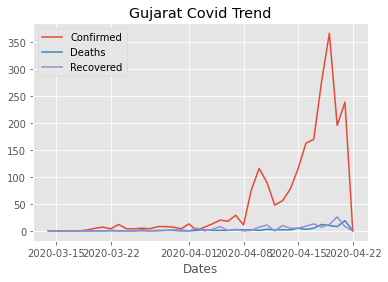

In [40]:
plt.clf()
plt.grid(True)
plt.plot(GJ_all.date,GJ_all.GJ, label='Confirmed')
plt.plot(GJ_all.date,GJ_all.GJdeath, label = 'Deaths')
plt.plot(GJ_all.date,GJ_all.GJrecov, label = 'Recovered')
plt.legend()
plt.xlabel('Dates'); 
plt.title('Gujarat Covid Trend')
plt.show()

In [0]:
#plt.rcParams

In [42]:
a='TS'
b = a+'recov'
b

'TSrecov'

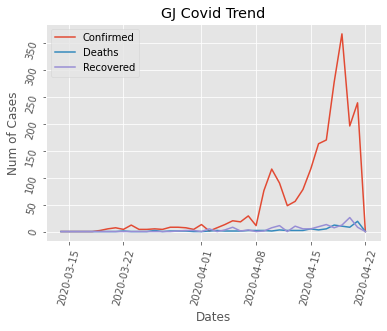

In [43]:
from matplotlib import style
style.use('ggplot') #or plt.style.use('ggplot')


# Put your state code here, get the trendlines of confirmed cases, deaths and recovered cases.

s_Code = 'GJ'
s_Columns = ['date', s_Code, s_Code+'death', s_Code+'recov']
s_Data = states_all[s_Columns]

plt.clf(); 
plt.grid(True)
plt.plot(s_Data.date,s_Data[s_Data.columns[1]], label='Confirmed')
plt.plot(s_Data.date,s_Data[s_Data.columns[2]], label = 'Deaths')
plt.plot(s_Data.date,s_Data[s_Data.columns[3]], label = 'Recovered')
plt.legend(); #plt.yscale('simlog')
plt.xlabel('Dates'); plt.ylabel('Num of Cases'); 
plt.title(str( s_Code + ' Covid Trend')); 
plt.tick_params(labelrotation=75)
plt.show()

In [44]:
#Let's try something else now. Trend of Changes may be ?


for col in states_confirmed.columns:

  col_temp = str(col) + '_diff'
  s_conf[col_temp] = states_confirmed.col.

s_Columns = ['date', s_Code, s_Code+'death', s_Code+'recov']
s_temp = states_all[s_Columns]

plt.clf(); 
plt.grid(True)
plt.plot(s_Data.date,s_Data[s_Data.columns[1]], label='Confirmed')
plt.plot(s_Data.date,s_Data[s_Data.columns[2]], label = 'Deaths')
plt.plot(s_Data.date,s_Data[s_Data.columns[3]], label = 'Recovered')
plt.legend(); #plt.yscale('simlog')
plt.xlabel('Dates'); plt.ylabel('Num of Cases'); 
plt.title(str( s_Code + ' Covid Trend')); 
plt.tick_params(labelrotation=75)
plt.show()


SyntaxError: ignored